In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import seaborn as sns

In [2]:
data=pd.read_csv('ML_Data_48.csv')

In [3]:
data=data.drop(['Z_jerk_mean', 'X_jerk_mean', 'total_jerk_mean', 'Y_jerk_mean','X_jerk_mean','X_jerk_min', 'X_min', 'timestamp_range', 'Y_mean', 'X_mean', 'X_max','Z_mean', 'X_jerk_max', 'X_jerk_range', 'X_range'], axis=1)

In [4]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [5]:
x=data.drop(['label'], axis=1)
y=data['label']

In [6]:
scale=StandardScaler()
x=scale.fit_transform(x)

In [7]:
x_train, x_t, y_train, y_t= train_test_split(x,y,test_size=0.3, random_state=42)
x_train.shape, x_t.shape

((2614, 33), (1121, 33))

In [8]:
x_val, x_test, y_val, y_test= train_test_split(x_t, y_t, test_size=0.15, random_state=42)
x_val.shape, x_test.shape

((952, 33), (169, 33))

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import Adam, SGD

2024-07-25 22:05:54.338031: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-25 22:05:54.339328: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-25 22:05:54.361796: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-25 22:05:54.361819: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-25 22:05:54.361834: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [10]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [11]:
model = Sequential([
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(8, activation='softmax')
])

In [12]:
initial_learning_rate = 0.01
lr_schedule = ExponentialDecay(
    initial_learning_rate,      # Starting learning rate
    decay_steps=1000,         # How often to decay the learning rate
    decay_rate=0.96,            # The decay rate
    staircase=True              # Apply decay in discrete steps
)

# early_stopping = EarlyStopping(monitor='val_loss', patience=70, restore_best_weights=True)

In [13]:
model.compile(optimizer=SGD(learning_rate=lr_schedule, 
                            momentum=0.97, 
                            nesterov=True),  # Enable Nesterov momentum
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [14]:
# model.compile(optimizer=Adam(), 
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#               metrics=['accuracy'])

In [15]:
history = model.fit(x_train, y_train,
                                epochs=800,
                                batch_size=64,
                                validation_data= (x_val, y_val),
                                verbose=2)

Epoch 1/800
41/41 - 1s - loss: 1.9334 - accuracy: 0.2234 - val_loss: 1.8495 - val_accuracy: 0.2679 - 514ms/epoch - 13ms/step
Epoch 2/800
41/41 - 0s - loss: 1.7657 - accuracy: 0.3279 - val_loss: 1.7060 - val_accuracy: 0.3529 - 59ms/epoch - 1ms/step
Epoch 3/800
41/41 - 0s - loss: 1.6274 - accuracy: 0.3883 - val_loss: 1.5339 - val_accuracy: 0.4128 - 58ms/epoch - 1ms/step
Epoch 4/800
41/41 - 0s - loss: 1.4808 - accuracy: 0.4392 - val_loss: 1.4014 - val_accuracy: 0.4538 - 57ms/epoch - 1ms/step
Epoch 5/800
41/41 - 0s - loss: 1.3975 - accuracy: 0.4522 - val_loss: 1.3276 - val_accuracy: 0.4811 - 57ms/epoch - 1ms/step
Epoch 6/800
41/41 - 0s - loss: 1.3579 - accuracy: 0.4774 - val_loss: 1.2977 - val_accuracy: 0.4832 - 56ms/epoch - 1ms/step
Epoch 7/800
41/41 - 0s - loss: 1.3304 - accuracy: 0.4897 - val_loss: 1.2778 - val_accuracy: 0.5053 - 57ms/epoch - 1ms/step
Epoch 8/800
41/41 - 0s - loss: 1.2829 - accuracy: 0.5168 - val_loss: 1.2139 - val_accuracy: 0.5158 - 57ms/epoch - 1ms/step
Epoch 9/800
41

Epoch 68/800
41/41 - 0s - loss: 0.7233 - accuracy: 0.7280 - val_loss: 0.7457 - val_accuracy: 0.7363 - 56ms/epoch - 1ms/step
Epoch 69/800
41/41 - 0s - loss: 0.7232 - accuracy: 0.7345 - val_loss: 0.7454 - val_accuracy: 0.7395 - 56ms/epoch - 1ms/step
Epoch 70/800
41/41 - 0s - loss: 0.7242 - accuracy: 0.7376 - val_loss: 0.7766 - val_accuracy: 0.7374 - 55ms/epoch - 1ms/step
Epoch 71/800
41/41 - 0s - loss: 0.7015 - accuracy: 0.7506 - val_loss: 0.7613 - val_accuracy: 0.7395 - 55ms/epoch - 1ms/step
Epoch 72/800
41/41 - 0s - loss: 0.6983 - accuracy: 0.7437 - val_loss: 0.7467 - val_accuracy: 0.7447 - 56ms/epoch - 1ms/step
Epoch 73/800
41/41 - 0s - loss: 0.7182 - accuracy: 0.7471 - val_loss: 0.7573 - val_accuracy: 0.7374 - 55ms/epoch - 1ms/step
Epoch 74/800
41/41 - 0s - loss: 0.7108 - accuracy: 0.7467 - val_loss: 0.7409 - val_accuracy: 0.7395 - 56ms/epoch - 1ms/step
Epoch 75/800
41/41 - 0s - loss: 0.6903 - accuracy: 0.7510 - val_loss: 0.7351 - val_accuracy: 0.7511 - 59ms/epoch - 1ms/step
Epoch 76

Epoch 134/800
41/41 - 0s - loss: 0.5563 - accuracy: 0.8022 - val_loss: 0.6756 - val_accuracy: 0.7794 - 56ms/epoch - 1ms/step
Epoch 135/800
41/41 - 0s - loss: 0.5513 - accuracy: 0.7972 - val_loss: 0.6910 - val_accuracy: 0.7584 - 57ms/epoch - 1ms/step
Epoch 136/800
41/41 - 0s - loss: 0.5600 - accuracy: 0.8034 - val_loss: 0.6878 - val_accuracy: 0.7658 - 56ms/epoch - 1ms/step
Epoch 137/800
41/41 - 0s - loss: 0.5272 - accuracy: 0.8137 - val_loss: 0.6640 - val_accuracy: 0.7910 - 56ms/epoch - 1ms/step
Epoch 138/800
41/41 - 0s - loss: 0.5252 - accuracy: 0.8118 - val_loss: 0.6475 - val_accuracy: 0.7847 - 56ms/epoch - 1ms/step
Epoch 139/800
41/41 - 0s - loss: 0.5304 - accuracy: 0.8060 - val_loss: 0.6653 - val_accuracy: 0.7710 - 56ms/epoch - 1ms/step
Epoch 140/800
41/41 - 0s - loss: 0.5704 - accuracy: 0.8022 - val_loss: 0.6815 - val_accuracy: 0.7752 - 56ms/epoch - 1ms/step
Epoch 141/800
41/41 - 0s - loss: 0.5440 - accuracy: 0.8015 - val_loss: 0.7019 - val_accuracy: 0.7626 - 57ms/epoch - 1ms/step


Epoch 200/800
41/41 - 0s - loss: 0.4755 - accuracy: 0.8313 - val_loss: 0.6566 - val_accuracy: 0.7868 - 55ms/epoch - 1ms/step
Epoch 201/800
41/41 - 0s - loss: 0.4395 - accuracy: 0.8420 - val_loss: 0.6239 - val_accuracy: 0.7983 - 56ms/epoch - 1ms/step
Epoch 202/800
41/41 - 0s - loss: 0.4486 - accuracy: 0.8405 - val_loss: 0.6562 - val_accuracy: 0.7899 - 56ms/epoch - 1ms/step
Epoch 203/800
41/41 - 0s - loss: 0.4407 - accuracy: 0.8447 - val_loss: 0.6409 - val_accuracy: 0.7973 - 56ms/epoch - 1ms/step
Epoch 204/800
41/41 - 0s - loss: 0.4200 - accuracy: 0.8481 - val_loss: 0.6272 - val_accuracy: 0.7962 - 56ms/epoch - 1ms/step
Epoch 205/800
41/41 - 0s - loss: 0.4455 - accuracy: 0.8424 - val_loss: 0.6597 - val_accuracy: 0.7857 - 56ms/epoch - 1ms/step
Epoch 206/800
41/41 - 0s - loss: 0.4504 - accuracy: 0.8401 - val_loss: 0.6491 - val_accuracy: 0.7889 - 57ms/epoch - 1ms/step
Epoch 207/800
41/41 - 0s - loss: 0.4634 - accuracy: 0.8397 - val_loss: 0.6481 - val_accuracy: 0.7889 - 56ms/epoch - 1ms/step


Epoch 266/800
41/41 - 0s - loss: 0.4176 - accuracy: 0.8485 - val_loss: 0.6393 - val_accuracy: 0.8151 - 56ms/epoch - 1ms/step
Epoch 267/800
41/41 - 0s - loss: 0.4342 - accuracy: 0.8454 - val_loss: 0.6589 - val_accuracy: 0.8067 - 55ms/epoch - 1ms/step
Epoch 268/800
41/41 - 0s - loss: 0.4187 - accuracy: 0.8535 - val_loss: 0.6460 - val_accuracy: 0.8120 - 56ms/epoch - 1ms/step
Epoch 269/800
41/41 - 0s - loss: 0.4107 - accuracy: 0.8531 - val_loss: 0.6255 - val_accuracy: 0.8151 - 56ms/epoch - 1ms/step
Epoch 270/800
41/41 - 0s - loss: 0.3895 - accuracy: 0.8650 - val_loss: 0.6215 - val_accuracy: 0.8067 - 57ms/epoch - 1ms/step
Epoch 271/800
41/41 - 0s - loss: 0.4087 - accuracy: 0.8512 - val_loss: 0.6272 - val_accuracy: 0.8099 - 57ms/epoch - 1ms/step
Epoch 272/800
41/41 - 0s - loss: 0.4021 - accuracy: 0.8569 - val_loss: 0.6482 - val_accuracy: 0.8015 - 56ms/epoch - 1ms/step
Epoch 273/800
41/41 - 0s - loss: 0.3746 - accuracy: 0.8745 - val_loss: 0.6538 - val_accuracy: 0.7962 - 56ms/epoch - 1ms/step


Epoch 332/800
41/41 - 0s - loss: 0.3595 - accuracy: 0.8749 - val_loss: 0.6567 - val_accuracy: 0.8036 - 58ms/epoch - 1ms/step
Epoch 333/800
41/41 - 0s - loss: 0.3682 - accuracy: 0.8688 - val_loss: 0.6598 - val_accuracy: 0.8109 - 60ms/epoch - 1ms/step
Epoch 334/800
41/41 - 0s - loss: 0.3622 - accuracy: 0.8695 - val_loss: 0.6590 - val_accuracy: 0.8025 - 59ms/epoch - 1ms/step
Epoch 335/800
41/41 - 0s - loss: 0.3440 - accuracy: 0.8787 - val_loss: 0.6662 - val_accuracy: 0.8109 - 59ms/epoch - 1ms/step
Epoch 336/800
41/41 - 0s - loss: 0.3540 - accuracy: 0.8738 - val_loss: 0.6620 - val_accuracy: 0.8067 - 57ms/epoch - 1ms/step
Epoch 337/800
41/41 - 0s - loss: 0.3703 - accuracy: 0.8707 - val_loss: 0.6429 - val_accuracy: 0.8183 - 56ms/epoch - 1ms/step
Epoch 338/800
41/41 - 0s - loss: 0.3468 - accuracy: 0.8703 - val_loss: 0.6687 - val_accuracy: 0.7983 - 56ms/epoch - 1ms/step
Epoch 339/800
41/41 - 0s - loss: 0.3468 - accuracy: 0.8780 - val_loss: 0.6559 - val_accuracy: 0.7899 - 56ms/epoch - 1ms/step


Epoch 398/800
41/41 - 0s - loss: 0.3153 - accuracy: 0.8898 - val_loss: 0.6693 - val_accuracy: 0.8046 - 58ms/epoch - 1ms/step
Epoch 399/800
41/41 - 0s - loss: 0.2959 - accuracy: 0.8994 - val_loss: 0.6940 - val_accuracy: 0.7962 - 56ms/epoch - 1ms/step
Epoch 400/800
41/41 - 0s - loss: 0.2963 - accuracy: 0.8967 - val_loss: 0.6602 - val_accuracy: 0.8078 - 57ms/epoch - 1ms/step
Epoch 401/800
41/41 - 0s - loss: 0.2953 - accuracy: 0.8914 - val_loss: 0.6626 - val_accuracy: 0.8078 - 60ms/epoch - 1ms/step
Epoch 402/800
41/41 - 0s - loss: 0.2966 - accuracy: 0.8986 - val_loss: 0.6990 - val_accuracy: 0.8036 - 62ms/epoch - 2ms/step
Epoch 403/800
41/41 - 0s - loss: 0.3354 - accuracy: 0.8783 - val_loss: 0.6884 - val_accuracy: 0.8057 - 63ms/epoch - 2ms/step
Epoch 404/800
41/41 - 0s - loss: 0.3111 - accuracy: 0.8929 - val_loss: 0.6577 - val_accuracy: 0.8088 - 66ms/epoch - 2ms/step
Epoch 405/800
41/41 - 0s - loss: 0.3275 - accuracy: 0.8806 - val_loss: 0.6466 - val_accuracy: 0.8088 - 58ms/epoch - 1ms/step


Epoch 464/800
41/41 - 0s - loss: 0.3003 - accuracy: 0.8894 - val_loss: 0.6684 - val_accuracy: 0.8120 - 61ms/epoch - 1ms/step
Epoch 465/800
41/41 - 0s - loss: 0.2893 - accuracy: 0.8956 - val_loss: 0.6444 - val_accuracy: 0.8225 - 59ms/epoch - 1ms/step
Epoch 466/800
41/41 - 0s - loss: 0.2808 - accuracy: 0.9005 - val_loss: 0.6751 - val_accuracy: 0.8109 - 63ms/epoch - 2ms/step
Epoch 467/800
41/41 - 0s - loss: 0.2783 - accuracy: 0.9036 - val_loss: 0.6750 - val_accuracy: 0.8141 - 57ms/epoch - 1ms/step
Epoch 468/800
41/41 - 0s - loss: 0.2693 - accuracy: 0.9044 - val_loss: 0.6865 - val_accuracy: 0.8130 - 57ms/epoch - 1ms/step
Epoch 469/800
41/41 - 0s - loss: 0.2820 - accuracy: 0.9021 - val_loss: 0.6782 - val_accuracy: 0.8004 - 59ms/epoch - 1ms/step
Epoch 470/800
41/41 - 0s - loss: 0.2810 - accuracy: 0.9005 - val_loss: 0.6659 - val_accuracy: 0.8130 - 58ms/epoch - 1ms/step
Epoch 471/800
41/41 - 0s - loss: 0.2694 - accuracy: 0.9078 - val_loss: 0.6606 - val_accuracy: 0.8057 - 56ms/epoch - 1ms/step


Epoch 530/800
41/41 - 0s - loss: 0.2547 - accuracy: 0.9116 - val_loss: 0.7054 - val_accuracy: 0.8141 - 56ms/epoch - 1ms/step
Epoch 531/800
41/41 - 0s - loss: 0.2558 - accuracy: 0.9097 - val_loss: 0.6963 - val_accuracy: 0.8162 - 56ms/epoch - 1ms/step
Epoch 532/800
41/41 - 0s - loss: 0.2548 - accuracy: 0.9086 - val_loss: 0.6691 - val_accuracy: 0.8183 - 56ms/epoch - 1ms/step
Epoch 533/800
41/41 - 0s - loss: 0.2539 - accuracy: 0.9120 - val_loss: 0.7147 - val_accuracy: 0.8057 - 56ms/epoch - 1ms/step
Epoch 534/800
41/41 - 0s - loss: 0.2585 - accuracy: 0.9078 - val_loss: 0.6937 - val_accuracy: 0.8067 - 56ms/epoch - 1ms/step
Epoch 535/800
41/41 - 0s - loss: 0.2688 - accuracy: 0.9044 - val_loss: 0.7031 - val_accuracy: 0.8109 - 56ms/epoch - 1ms/step
Epoch 536/800
41/41 - 0s - loss: 0.2507 - accuracy: 0.9116 - val_loss: 0.6895 - val_accuracy: 0.8130 - 57ms/epoch - 1ms/step
Epoch 537/800
41/41 - 0s - loss: 0.2593 - accuracy: 0.9109 - val_loss: 0.6914 - val_accuracy: 0.8120 - 56ms/epoch - 1ms/step


Epoch 596/800
41/41 - 0s - loss: 0.2204 - accuracy: 0.9235 - val_loss: 0.6829 - val_accuracy: 0.8267 - 66ms/epoch - 2ms/step
Epoch 597/800
41/41 - 0s - loss: 0.2105 - accuracy: 0.9250 - val_loss: 0.6973 - val_accuracy: 0.8172 - 64ms/epoch - 2ms/step
Epoch 598/800
41/41 - 0s - loss: 0.2389 - accuracy: 0.9181 - val_loss: 0.6852 - val_accuracy: 0.8214 - 59ms/epoch - 1ms/step
Epoch 599/800
41/41 - 0s - loss: 0.2415 - accuracy: 0.9170 - val_loss: 0.6904 - val_accuracy: 0.8256 - 59ms/epoch - 1ms/step
Epoch 600/800
41/41 - 0s - loss: 0.2268 - accuracy: 0.9262 - val_loss: 0.7079 - val_accuracy: 0.8246 - 58ms/epoch - 1ms/step
Epoch 601/800
41/41 - 0s - loss: 0.2335 - accuracy: 0.9204 - val_loss: 0.7168 - val_accuracy: 0.8277 - 58ms/epoch - 1ms/step
Epoch 602/800
41/41 - 0s - loss: 0.2414 - accuracy: 0.9151 - val_loss: 0.7126 - val_accuracy: 0.8277 - 57ms/epoch - 1ms/step
Epoch 603/800
41/41 - 0s - loss: 0.2367 - accuracy: 0.9139 - val_loss: 0.7041 - val_accuracy: 0.8246 - 60ms/epoch - 1ms/step


Epoch 662/800
41/41 - 0s - loss: 0.2388 - accuracy: 0.9200 - val_loss: 0.6784 - val_accuracy: 0.8214 - 58ms/epoch - 1ms/step
Epoch 663/800
41/41 - 0s - loss: 0.2107 - accuracy: 0.9258 - val_loss: 0.7119 - val_accuracy: 0.8330 - 58ms/epoch - 1ms/step
Epoch 664/800
41/41 - 0s - loss: 0.2034 - accuracy: 0.9300 - val_loss: 0.7097 - val_accuracy: 0.8298 - 60ms/epoch - 1ms/step
Epoch 665/800
41/41 - 0s - loss: 0.2312 - accuracy: 0.9243 - val_loss: 0.6899 - val_accuracy: 0.8298 - 62ms/epoch - 2ms/step
Epoch 666/800
41/41 - 0s - loss: 0.2041 - accuracy: 0.9288 - val_loss: 0.7118 - val_accuracy: 0.8183 - 60ms/epoch - 1ms/step
Epoch 667/800
41/41 - 0s - loss: 0.1975 - accuracy: 0.9350 - val_loss: 0.7241 - val_accuracy: 0.8162 - 61ms/epoch - 1ms/step
Epoch 668/800
41/41 - 0s - loss: 0.2031 - accuracy: 0.9239 - val_loss: 0.7147 - val_accuracy: 0.8235 - 60ms/epoch - 1ms/step
Epoch 669/800
41/41 - 0s - loss: 0.2138 - accuracy: 0.9250 - val_loss: 0.7159 - val_accuracy: 0.8172 - 59ms/epoch - 1ms/step


Epoch 728/800
41/41 - 0s - loss: 0.2224 - accuracy: 0.9227 - val_loss: 0.7067 - val_accuracy: 0.8193 - 61ms/epoch - 1ms/step
Epoch 729/800
41/41 - 0s - loss: 0.2073 - accuracy: 0.9250 - val_loss: 0.7159 - val_accuracy: 0.8214 - 61ms/epoch - 1ms/step
Epoch 730/800
41/41 - 0s - loss: 0.2203 - accuracy: 0.9204 - val_loss: 0.7097 - val_accuracy: 0.8235 - 61ms/epoch - 1ms/step
Epoch 731/800
41/41 - 0s - loss: 0.1853 - accuracy: 0.9357 - val_loss: 0.7211 - val_accuracy: 0.8204 - 57ms/epoch - 1ms/step
Epoch 732/800
41/41 - 0s - loss: 0.2199 - accuracy: 0.9246 - val_loss: 0.7239 - val_accuracy: 0.8172 - 59ms/epoch - 1ms/step
Epoch 733/800
41/41 - 0s - loss: 0.2261 - accuracy: 0.9227 - val_loss: 0.7332 - val_accuracy: 0.8088 - 62ms/epoch - 2ms/step
Epoch 734/800
41/41 - 0s - loss: 0.2039 - accuracy: 0.9258 - val_loss: 0.7261 - val_accuracy: 0.8214 - 59ms/epoch - 1ms/step
Epoch 735/800
41/41 - 0s - loss: 0.2240 - accuracy: 0.9277 - val_loss: 0.7180 - val_accuracy: 0.8204 - 57ms/epoch - 1ms/step


Epoch 794/800
41/41 - 0s - loss: 0.1832 - accuracy: 0.9365 - val_loss: 0.6903 - val_accuracy: 0.8393 - 66ms/epoch - 2ms/step
Epoch 795/800
41/41 - 0s - loss: 0.1865 - accuracy: 0.9281 - val_loss: 0.7059 - val_accuracy: 0.8309 - 67ms/epoch - 2ms/step
Epoch 796/800
41/41 - 0s - loss: 0.1760 - accuracy: 0.9399 - val_loss: 0.7048 - val_accuracy: 0.8330 - 64ms/epoch - 2ms/step
Epoch 797/800
41/41 - 0s - loss: 0.1693 - accuracy: 0.9361 - val_loss: 0.7037 - val_accuracy: 0.8298 - 69ms/epoch - 2ms/step
Epoch 798/800
41/41 - 0s - loss: 0.1928 - accuracy: 0.9350 - val_loss: 0.7064 - val_accuracy: 0.8414 - 66ms/epoch - 2ms/step
Epoch 799/800
41/41 - 0s - loss: 0.1730 - accuracy: 0.9338 - val_loss: 0.6958 - val_accuracy: 0.8340 - 64ms/epoch - 2ms/step
Epoch 800/800
41/41 - 0s - loss: 0.1746 - accuracy: 0.9411 - val_loss: 0.7167 - val_accuracy: 0.8298 - 65ms/epoch - 2ms/step


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               8704      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                5

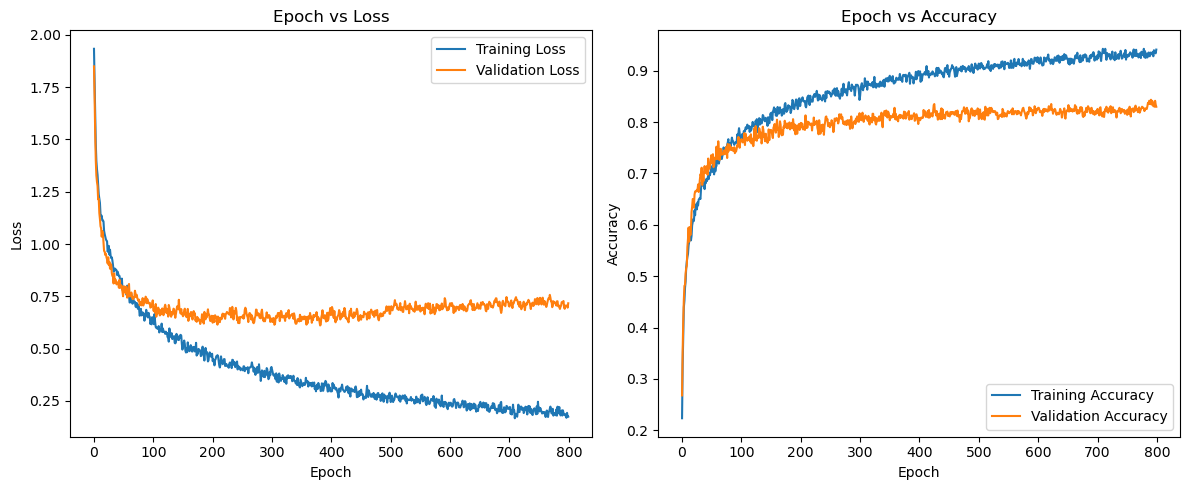

In [17]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [18]:
train_loss, train_accuracy = model.evaluate(x_train, y_train, verbose=0)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 98.55%
Test Accuracy: 80.47%


6/6 [==============================] - 0s 822us/step


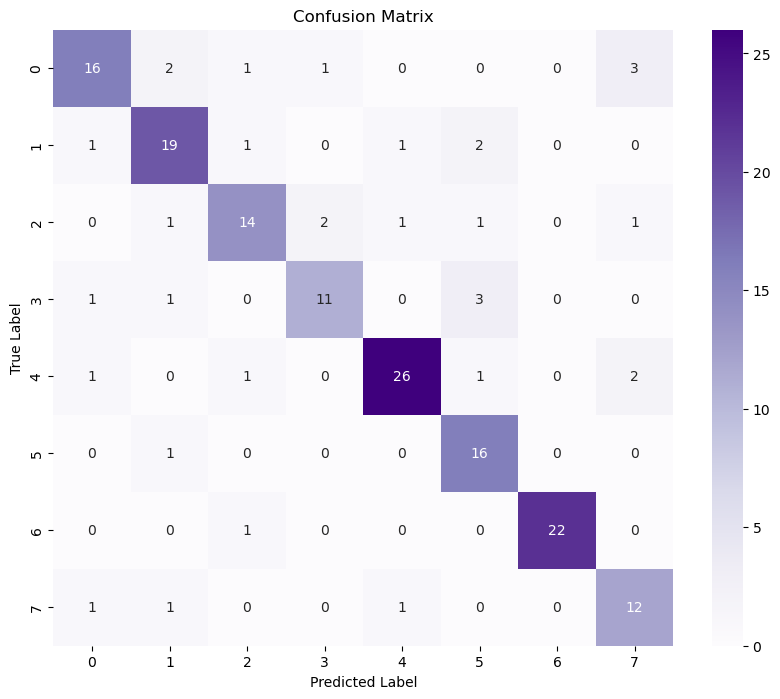

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.70      0.74        23
           1       0.76      0.79      0.78        24
           2       0.78      0.70      0.74        20
           3       0.79      0.69      0.73        16
           4       0.90      0.84      0.87        31
           5       0.70      0.94      0.80        17
           6       1.00      0.96      0.98        23
           7       0.67      0.80      0.73        15

    accuracy                           0.80       169
   macro avg       0.80      0.80      0.80       169
weighted avg       0.81      0.80      0.81       169



In [19]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

if len(y_test.shape) == 1 or y_test.shape[1] == 1:
    y_true = y_test  
else:
    y_true = np.argmax(y_test, axis=1)  


conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_true, y_pred_classes, target_names=[str(i) for i in range(len(np.unique(y_true)))])
print("Classification Report:")
print(class_report)
